# Support Vector Machines

Recall that the perceptron separates instances of the positive class from instances of the negative class using a hyperplane as a decision boundary. The decision boundary is given by the following formula:

![Fig](imgs/img_001.png)

![Fig](imgs/img_003.png)

### Mapping features to a higher dimensional space - Polynomial Regression

We mapped features to a higher dimensional space in which they were linearly related to the response variable. The mapping increased the number of features by creating quadratic terms from combinations of the original features. These synthetic features allowed us to express a nonlinear function with a linear model.

The plot on the left in the following figure shows the original feature space of a linearly inseparable dataset. The plot on the right shows that the data is linearly separable after mapping to a higher dimensional space:
![Fig](imgs/img_002.png)

This is what equation for regression with multiple variables looks like -
![Fig](imgs/img_005.png)

![Fig](imgs/img_007.png)

![Fig](imgs/img_008.png)

![Fig](imgs/img_009.png)

![Fig](imgs/img_010.png)

![Fig](imgs/img_011.png)

![Fig](imgs/img_012.png)

Assume phi to be a non-linear function below

![Fig](imgs/img_004.png)

phi_transpose * phi is the convariance matrix

![Fig](imgs/img_013.png)

![Fig](imgs/img_014.png)

![Fig](imgs/img_015.png)

![Fig](imgs/img_016.png)

![Fig](imgs/img_017.png)

![Fig](imgs/img_018.png)

### Kernel Trick

Converting to higher dimensions is computationally expensive.
A function which takes as input vectors in the original space but returns as output dotproduct in the feature space
is the kernel trick. Using a kernel function we can apply dotproduct between 2 vectors so every vector in the input
space is mapped to vectors in the output space. Thus we transform a non-linear space into a linear space.
Poupular kernel types which can transform non-linear input space into linear higher dimension output space are -
1. Polynomial Kernel
2. Radial Basis Function kernel
3. Sigmoid kernel

### Classifying handwritten digits

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

train = pd.read_csv('../datasets/mnist/train.csv')
test = pd.read_csv('../datasets/mnist/test.csv')

In [18]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
train.shape, test.shape

((42000, 785), (28000, 784))

In [21]:
pixels = range(784)
pixels = ['pixel'+str(i) for i in pixels]

In [22]:
mnist_train = train[pixels].values

In [25]:
X = mnist_train
y = train['label'].values

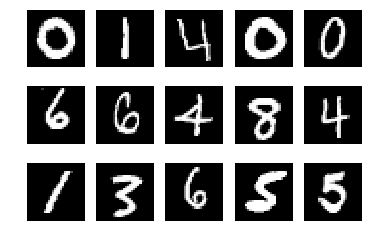

In [23]:
counter = 1
for i in range(1, 4):
    for j in range(1, 6):
        plt.subplot(3, 5, counter)
        plt.imshow(mnist_train[(i - 1) * 8000 + j].reshape((28,28)), cmap=cm.Greys_r)
        plt.axis('off')
        counter += 1
plt.show()

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
# X = X/255.0*2 - 1
X = X/255.0
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=11)

clf = SVC(kernel='rbf', C=3., gamma=0.01)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

In [31]:
# X = X/255.0*2 - 1
# X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=11)
 
# pipeline = Pipeline([
#     ('clf', SVC(kernel='rbf', gamma=0.01, C=100))
# ])

# parameters = {
#     'clf__gamma': (0.01, 0.03, 0.1, 0.3, 1),
#     'clf__C': (0.1, 0.3, 1, 3, 10, 30),
# }

# grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy')
# grid_search.fit(X_train[:10000], y_train[:10000])
# print('Best score: %0.3f' % grid_search.best_score_)
# print('Best parameters set:')
# best_parameters = grid_search.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#     print('\t%s: %r' % (param_name,
#       best_parameters[param_name]))

# predictions = grid_search.predict(X_test)
# print(classification_report(y_test, predictions))